# DAT210x - Programming with Python for DS

## Module4- Lab5

Now that you've had your first taste of isomap, let's take your knowledge of it to the next level.

Whatever your high-dimensional samples are, be they images, sound files, or thoughtfully collected attributes, they can all be considered single points in a high dimensional feature-space. Each one of your observations is just a single point. Even with a high dimensionality, it's possible that most or all your samples actually lie on a lower dimension surface. Isomap aims to capture that embedding, which is essentially the motion in the underlying, non-linear degrees of freedom.

By testing isomap on a carefully constructed dataset, you will be able to visually confirm its effectiveness, and gain a deeper understanding of how and why each parameter acts the way it does. The ALOI, Amsterdam Library of Object Images, hosts a huge collection of 1000 small objects that were photographed in such a controlled environment, by systematically varying the viewing angle, illumination angle, and illumination color for each object separately. To really drive home how well isomap does what it claims, this lab will make use of two image sets taken from the ALOI's collection.

Manifold extraction, and isomap specifically are really good with vision recognition problems, speech problems, and many other real-world tasks, such as identifying similar objects, or objects that have undergone some change. In the case of the 3D rotating object such as the office chair example from earlier, if every pixel is a feature, at the end of the day, the manifold surface is parametrizable by just the angle of the chair—a single feature!

Start by having a look through the Module4/Datasets/ALOI/ directory. There are two directories filled with 192 x 144 pixel images. Identify their ordering and try to figure out what's changing between the images. They might not be perfectly ordered, but that doesn't matter to isomap.

Create a regular Python list object. Then, write a for-loop that iterates over the images in the Module4/Datasets/ALOI/32/ folder, appending each of them to your list. Each .PNG image should first be loaded into a temporary NDArray, just as shown in the Feature Representation reading. Optional: Resample your images down by a factor of two if you have a slower computer. You can also convert the image from  0-255  to  0.0-1.0  if you'd like, but that will have no effect on the algorithm's results.

Convert the list to a dataframe and run isomap on it to compute the lower dimensional embedding. Be sure to set n_components to 3 so you can visualize your manifold. You can also set the neighborhood size to six.

Plot the first two manifold components using a 2D scatter plot, then plot the first three components using a 3D scatter plot. Run your assignment and then answer the questions below.

In [124]:
import pandas as pd

from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [125]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Create a regular Python list (not NDArray) and name it `samples`:

In [126]:
samples_b = []
samples_r = []

Code up a for-loop that iterates over the images in the `Datasets/ALOI/32/` folder. Look in the folder first, so you know how the files are organized, and what file number they start from and end at.

Load each `.png` file individually in your for-loop using the instructions provided in the Feature Representation reading. Once loaded, flatten the image into a single-dimensional NDArray and append it to your `samples` list.

**Optional**: You can resample the image down by a factor of two if you have a slower computer. You can also scale the image from `0-255` to `0.0-1.0` if you'd like--doing so shouldn't have any effect on the algorithm's results.

In [127]:
import glob
from matplotlib.pyplot import imread
import math

In [128]:
lst_png_path = glob.glob('Datasets/ALOI/32/*')
for png_path in lst_png_path:
    png = imread(png_path)
    # print(png.shape) #(144, 192)    
    samples_b.append(png.reshape(-1))
print(len(samples_b))
print(samples_b[0].size)
print(144 * 192)

72
27648
27648


In [129]:
lst_png_path = glob.glob('Datasets/ALOI/32i/*')
for png_path in lst_png_path:
    png = imread(png_path)
    # print(png.shape) #(144, 192)    
    samples_r.append(png.reshape(-1))
print(len(samples_r))
print(samples_r[0].size)
print(144 * 192)

12
27648
27648


Convert `samples` to a DataFrame named `df`:

In [144]:
df = pd.DataFrame(samples_b + samples_r)
df_colors = pd.DataFrame((['b'] * len(samples_b)) + (['r'] * len(samples_r)), columns=['colors'])
print(df.shape)
print(df_colors.shape)

(84, 27648)
(84, 1)


Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [145]:
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors=6, n_components=3)
# isomap = Isomap(n_neighbors=1, n_components=3)
T1 = isomap.fit_transform(df.values)

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

<IPython.core.display.Javascript object>


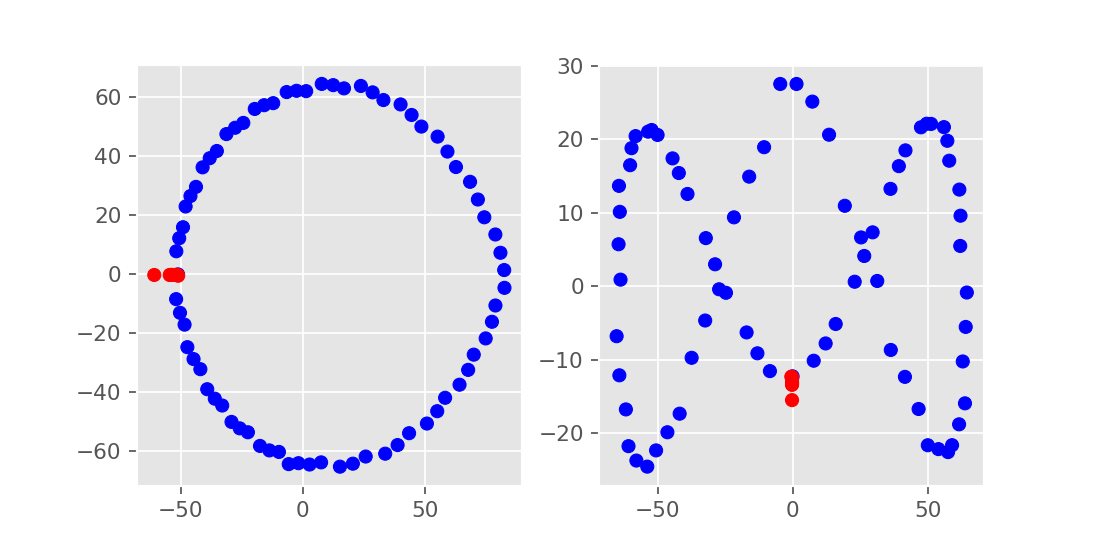

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3.5))
plt.subplot(121)
plt.scatter(x=T1[:,0], y=T1[:,1], marker='o', c=df_colors.colors.values)
plt.subplot(122)
plt.scatter(x=T1[:,1], y=T1[:,2], marker='o', c=df_colors.colors.values)

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

<IPython.core.display.Javascript object>


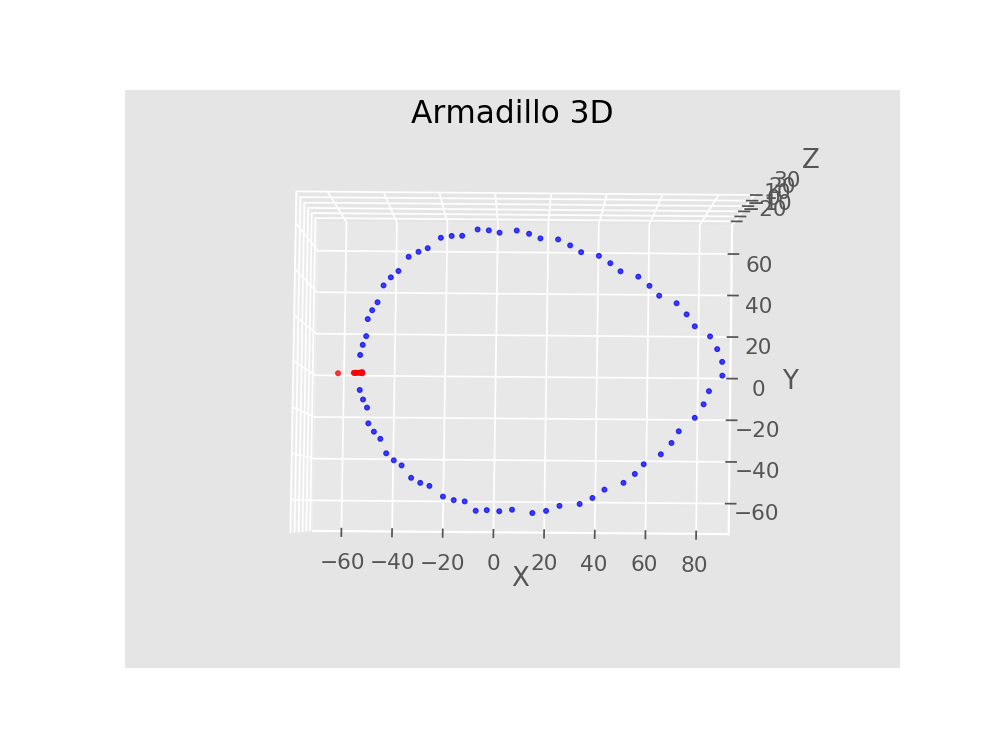

In [148]:
from mpl_toolkits.mplot3d import Axes3D
# from plyfile import PlyData, PlyElement
%matplotlib notebook
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(T1[:,0], T1[:,1], T1[:,2], c=df_colors.colors.values, marker='.', alpha=0.75)

Answer the first two lab questions!

Create another for loop. This time it should iterate over all the images in the `Datasets/ALOI/32_i` directory. Just like last time, load up each image, process them the way you did previously, and append them into your existing `samples` list:

In [ ]:
# .. your code here ..

Convert `samples` to a DataFrame named `df`:

In [ ]:
# .. your code here ..

Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [ ]:
# .. your code here ..

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

In [ ]:
# .. your code here ..

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

In [ ]:
# .. your code here ..